In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [2]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [13]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

Get GPU information to know which GPU is being used in training and testing

In [14]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Base model with the following structure:

For each Conv2D layer, the default stride value of (1, 1) is used unless otherwise specified

*   Conv2D layer with 32 neurons, and a kernel size of (3, 3) and padding to keep shape of input
*   Conv2D layer with 32 neurons, and a kernel size of (3, 3) and padding to keep shape of input
*   MaxPooling layer with a window size of (2, 2) that computes the max value within the window
*   Dropout layer that drops 0.2 (20%) of all values
*   Conv2D layer with 64 neurons, and a kernel size of (3, 3) and padding to keep shape of input
*   Conv2D layer with 64 neurons, and a kernel size of (3, 3) and padding to keep shape of input
*   MaxPooling layer with a window size of (2, 2) that computes the max value within the window
*   Dropout layer that drops 0.2 (20%) of all values
*   Conv2D layer with 128 neurons, and a kernel size of (3, 3) and padding to keep shape of input
*   Conv2D layer with 128 neurons, and a kernel size of (3, 3) and padding to keep shape of input
*   MaxPooling layer with a window size of (2, 2) that computes the max value within the window
*   Dropout layer that drops 0.2 (20%) of all values
*   Flatten layer
*   Dense fully connected layer
*   Dropout layer 
*   Dense fully connected layer of outputs of the 10 image classes

All models that are used use the same amount of neurons as a relatively high accuracy is acquired during training

In [15]:
model = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)         

In [16]:
h = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 141s 90ms/step - loss: 1.5442 - accuracy: 0.4337 - val_loss: 1.1794 - val_accuracy: 0.5854
Epoch 2/50
1563/1563 [==============================] - 152s 97ms/step - loss: 1.1202 - accuracy: 0.6019 - val_loss: 0.9584 - val_accuracy: 0.6614
Epoch 3/50
1563/1563 [==============================] - 147s 94ms/step - loss: 0.9436 - accuracy: 0.6640 - val_loss: 0.9476 - val_accuracy: 0.6689
Epoch 4/50
1563/1563 [==============================] - 157s 100ms/step - loss: 0.8378 - accuracy: 0.7051 - val_loss: 0.8259 - val_accuracy: 0.7156
Epoch 5/50
1563/1563 [==============================] - 150s 96ms/step - loss: 0.7741 - accuracy: 0.7279 - val_loss: 0.7956 - val_accuracy: 0.7224
Epoch 6/50
1563/1563 [==============================] - 155s 99ms/step - loss: 0.7159 - accuracy: 0.7495 - val_loss: 0.7006 - val_accuracy: 0.7576
Epoch 7/50
1563/1563 [==============================] - 143s 92ms/step - loss: 0.6748 - accuracy: 0.7626 - val_loss: 

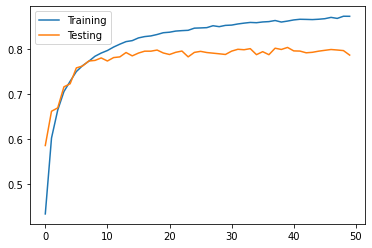

In [17]:
plot(h.history['accuracy'], label="Training")
plot(h.history['val_accuracy'], label="Testing")
pyplot.legend()

CNN with decreased MaxPooling window

In [18]:
model2 = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(1, 1)),
          Dropout(0.2),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(1, 1)),
          Dropout(0.2),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 64)       

In [19]:
h2 = model2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 1250s 800ms/step - loss: 1.6170 - accuracy: 0.4091 - val_loss: 1.2717 - val_accuracy: 0.5389
Epoch 2/50
1563/1563 [==============================] - 1889s 1s/step - loss: 1.2017 - accuracy: 0.5714 - val_loss: 1.0358 - val_accuracy: 0.6286
Epoch 3/50
1563/1563 [==============================] - 515s 329ms/step - loss: 1.0367 - accuracy: 0.6308 - val_loss: 0.9805 - val_accuracy: 0.6568
Epoch 4/50
1563/1563 [==============================] - 540s 345ms/step - loss: 0.9183 - accuracy: 0.6744 - val_loss: 0.9248 - val_accuracy: 0.6755
Epoch 5/50
1563/1563 [==============================] - 515s 329ms/step - loss: 0.8138 - accuracy: 0.7130 - val_loss: 0.8759 - val_accuracy: 0.6959
Epoch 6/50
1563/1563 [==============================] - 519s 332ms/step - loss: 0.7351 - accuracy: 0.7404 - val_loss: 0.8772 - val_accuracy: 0.7045
Epoch 7/50
1563/1563 [==============================] - 534s 342ms/step - loss: 0.6654 - accuracy: 0.7653 - val_l

This CNN has a higher accuracy during training, but a lower validation accuracy when testing

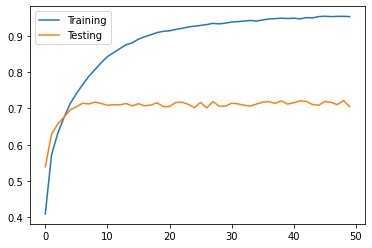

In [24]:
plot(h2.history['accuracy'], label="Training")
plot(h2.history['val_accuracy'], label="Testing")
pyplot.legend()

This CNN has a larger kernel size

In [25]:
model3 = tf.keras.models.Sequential([
          Conv2D(32, (4, 4), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (4, 4), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(64, (4, 4), padding='same', activation='relu'),
          Conv2D(64, (4, 4), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        1568      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        65600     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)         

In [26]:
h3 = model3.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 178s 114ms/step - loss: 1.6685 - accuracy: 0.3796 - val_loss: 1.3572 - val_accuracy: 0.4974
Epoch 2/50
1563/1563 [==============================] - 179s 114ms/step - loss: 1.2490 - accuracy: 0.5469 - val_loss: 1.1072 - val_accuracy: 0.5967
Epoch 3/50
1563/1563 [==============================] - 178s 114ms/step - loss: 1.0636 - accuracy: 0.6218 - val_loss: 0.9572 - val_accuracy: 0.6641
Epoch 4/50
1563/1563 [==============================] - 178s 114ms/step - loss: 0.9436 - accuracy: 0.6682 - val_loss: 0.8907 - val_accuracy: 0.6899
Epoch 5/50
1563/1563 [==============================] - 179s 114ms/step - loss: 0.8659 - accuracy: 0.6949 - val_loss: 0.8640 - val_accuracy: 0.6974
Epoch 6/50
1563/1563 [==============================] - 178s 114ms/step - loss: 0.8186 - accuracy: 0.7126 - val_loss: 0.7962 - val_accuracy: 0.7216
Epoch 7/50
1563/1563 [==============================] - 174s 111ms/step - loss: 0.7767 - accuracy: 0.7246 - val_

This CNN has both decreased training and validation accuracy

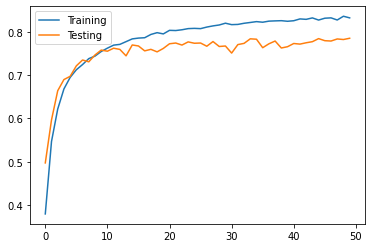

In [27]:
plot(h3.history['accuracy'], label="Training")
plot(h3.history['val_accuracy'], label="Testing")
pyplot.legend()

Decreased kernel size

In [28]:
model4 = tf.keras.models.Sequential([
          Conv2D(32, (2, 2), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (2, 2), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(64, (2, 2), padding='same', activation='relu'),
          Conv2D(64, (2, 2), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)         

In [29]:
h4 = model4.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 106s 68ms/step - loss: 1.5892 - accuracy: 0.4163 - val_loss: 1.1720 - val_accuracy: 0.5766
Epoch 2/50
1563/1563 [==============================] - 96s 62ms/step - loss: 1.1254 - accuracy: 0.5965 - val_loss: 1.0618 - val_accuracy: 0.6210
Epoch 3/50
1563/1563 [==============================] - 97s 62ms/step - loss: 0.9729 - accuracy: 0.6548 - val_loss: 0.8907 - val_accuracy: 0.6850
Epoch 4/50
1563/1563 [==============================] - 100s 64ms/step - loss: 0.8835 - accuracy: 0.6879 - val_loss: 0.8310 - val_accuracy: 0.7130
Epoch 5/50
1563/1563 [==============================] - 103s 66ms/step - loss: 0.8239 - accuracy: 0.7086 - val_loss: 0.7827 - val_accuracy: 0.7251
Epoch 6/50
1563/1563 [==============================] - 103s 66ms/step - loss: 0.7666 - accuracy: 0.7279 - val_loss: 0.7420 - val_accuracy: 0.7420
Epoch 7/50
1563/1563 [==============================] - 103s 66ms/step - loss: 0.7213 - accuracy: 0.7454 - val_loss: 0.7

Slightly lower training and testing accuracy. 

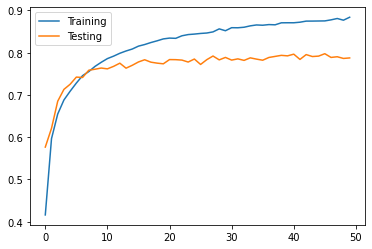

In [38]:
plot(h4.history['accuracy'], label="Training")
plot(h4.history['val_accuracy'], label="Testing")
pyplot.legend()

Add a stride of 2x2 in every Conv2D layer apart from input layer

In [108]:
model5 = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), (2, 2), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(128, (3, 3), (2, 2), padding='same', activation='relu'),
          Conv2D(128, (3, 3), (2, 2), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax') 
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_417 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_418 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_209 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_253 (Dropout)        (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_419 (Conv2D)          (None, 4, 4, 128)         36992     
_________________________________________________________________
conv2d_420 (Conv2D)          (None, 2, 2, 128)         147584    
_________________________________________________________________
max_pooling2d_210 (MaxPoolin (None, 1, 1, 128)       

In [109]:
h5 = model5.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6045 - accuracy: 0.4085 - val_loss: 1.2295 - val_accuracy: 0.5570
Epoch 2/50
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2140 - accuracy: 0.5652 - val_loss: 1.0549 - val_accuracy: 0.6207
Epoch 3/50
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0544 - accuracy: 0.6260 - val_loss: 0.9543 - val_accuracy: 0.6616
Epoch 4/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9652 - accuracy: 0.6598 - val_loss: 0.8957 - val_accuracy: 0.6841
Epoch 5/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8948 - accuracy: 0.6845 - val_loss: 0.8775 - val_accuracy: 0.6918
Epoch 6/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8470 - accuracy: 0.7002 - val_loss: 0.8619 - val_accuracy: 0.6992
Epoch 7/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8058 - accuracy: 0.7147 - val_loss: 0.8299 -

This CNN has a lower training accuracy and a slightly lower validation accuracy

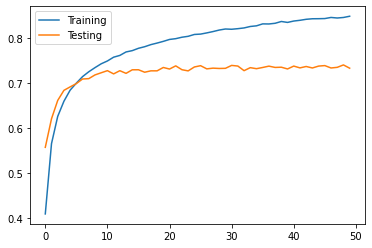

In [110]:
plot(h5.history['accuracy'], label="Training")
plot(h5.history['val_accuracy'], label="Testing")
pyplot.legend()

Increase stride amount to 4x4 and 2x2 in each block

In [112]:
model6 = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), (4, 4), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Conv2D(128, (3, 3), (2, 2), padding='same', activation='relu'),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model6.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_427 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_428 (Conv2D)          (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_214 (MaxPoolin (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_260 (Dropout)        (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_429 (Conv2D)          (None, 2, 2, 128)         36992     
_________________________________________________________________
conv2d_430 (Conv2D)          (None, 2, 2, 128)         147584    
_________________________________________________________________
max_pooling2d_215 (MaxPoolin (None, 1, 1, 128)       

In [113]:
h6 = model6.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6538 - accuracy: 0.3865 - val_loss: 1.3734 - val_accuracy: 0.4952
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3774 - accuracy: 0.5011 - val_loss: 1.2627 - val_accuracy: 0.5381
Epoch 3/50
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2693 - accuracy: 0.5414 - val_loss: 1.1359 - val_accuracy: 0.5907
Epoch 4/50
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1971 - accuracy: 0.5710 - val_loss: 1.1138 - val_accuracy: 0.6068
Epoch 5/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1417 - accuracy: 0.5930 - val_loss: 1.0584 - val_accuracy: 0.6267
Epoch 6/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0973 - accuracy: 0.6086 - val_loss: 1.0403 - val_accuracy: 0.6254
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0565 - accuracy: 0.6240 - val_loss: 1.0535 -

Training and validation accuracies are much lower than the base model 

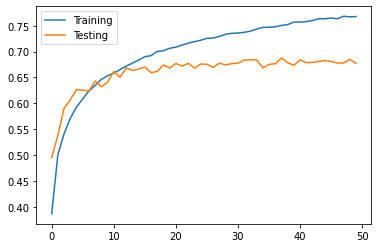

In [114]:
plot(h6.history['accuracy'], label="Training")
plot(h6.history['val_accuracy'], label="Testing")
pyplot.legend()

In [115]:
model7 = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(3, 3)),
          Dropout(0.2),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(3, 3)),
          Dropout(0.2),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model7.summary()

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_431 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_432 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_216 (MaxPoolin (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_263 (Dropout)        (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_433 (Conv2D)          (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_434 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_217 (MaxPoolin (None, 3, 3, 64)        

In [116]:
h7 = model7.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 87s 56ms/step - loss: 1.6277 - accuracy: 0.3927 - val_loss: 1.2651 - val_accuracy: 0.5394
Epoch 2/50
1563/1563 [==============================] - 86s 55ms/step - loss: 1.2118 - accuracy: 0.5678 - val_loss: 1.0348 - val_accuracy: 0.6380
Epoch 3/50
1563/1563 [==============================] - 92s 59ms/step - loss: 1.0257 - accuracy: 0.6420 - val_loss: 0.8926 - val_accuracy: 0.6864
Epoch 4/50
1563/1563 [==============================] - 99s 63ms/step - loss: 0.9250 - accuracy: 0.6775 - val_loss: 0.8904 - val_accuracy: 0.6934
Epoch 5/50
1563/1563 [==============================] - 98s 63ms/step - loss: 0.8582 - accuracy: 0.6990 - val_loss: 0.8074 - val_accuracy: 0.7243
Epoch 6/50
1563/1563 [==============================] - 98s 63ms/step - loss: 0.8220 - accuracy: 0.7167 - val_loss: 0.7432 - val_accuracy: 0.7467
Epoch 7/50
1563/1563 [==============================] - 97s 62ms/step - loss: 0.7859 - accuracy: 0.7297 - val_loss: 0.7796 -

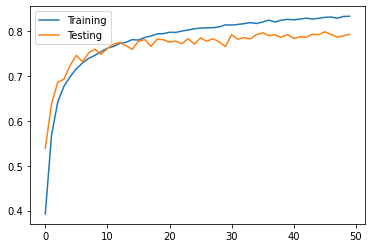

In [117]:
plot(h7.history['accuracy'], label="Training")
plot(h7.history['val_accuracy'], label="Testing")
pyplot.legend()

In [118]:
model8 = tf.keras.models.Sequential([
          Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
          Conv2D(32, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(4, 4)),
          Dropout(0.2),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          Conv2D(64, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(4, 4)),
          Dropout(0.2),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          Conv2D(128, (3, 3), padding='same', activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Dropout(0.2),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.2),
          Dense(10, activation='softmax')
])

model8.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model8.summary()

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_437 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_438 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_219 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_267 (Dropout)        (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_439 (Conv2D)          (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_440 (Conv2D)          (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_220 (MaxPoolin (None, 2, 2, 64)        

In [119]:
h8 = model8.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 76s 49ms/step - loss: 1.6310 - accuracy: 0.3903 - val_loss: 1.3056 - val_accuracy: 0.5382
Epoch 2/50
1563/1563 [==============================] - 79s 50ms/step - loss: 1.2369 - accuracy: 0.5560 - val_loss: 1.0607 - val_accuracy: 0.6279
Epoch 3/50
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0898 - accuracy: 0.6145 - val_loss: 1.0340 - val_accuracy: 0.6364
Epoch 4/50
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9911 - accuracy: 0.6519 - val_loss: 0.8742 - val_accuracy: 0.6906
Epoch 5/50
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9281 - accuracy: 0.6747 - val_loss: 0.8762 - val_accuracy: 0.7049
Epoch 6/50
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8830 - accuracy: 0.6911 - val_loss: 0.8632 - val_accuracy: 0.7012
Epoch 7/50
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8454 - accuracy: 0.7064 - val_loss: 0.7733 -

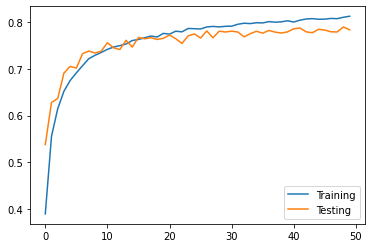

In [120]:
plot(h8.history['accuracy'], label="Training")
plot(h8.history['val_accuracy'], label="Testing")
pyplot.legend()

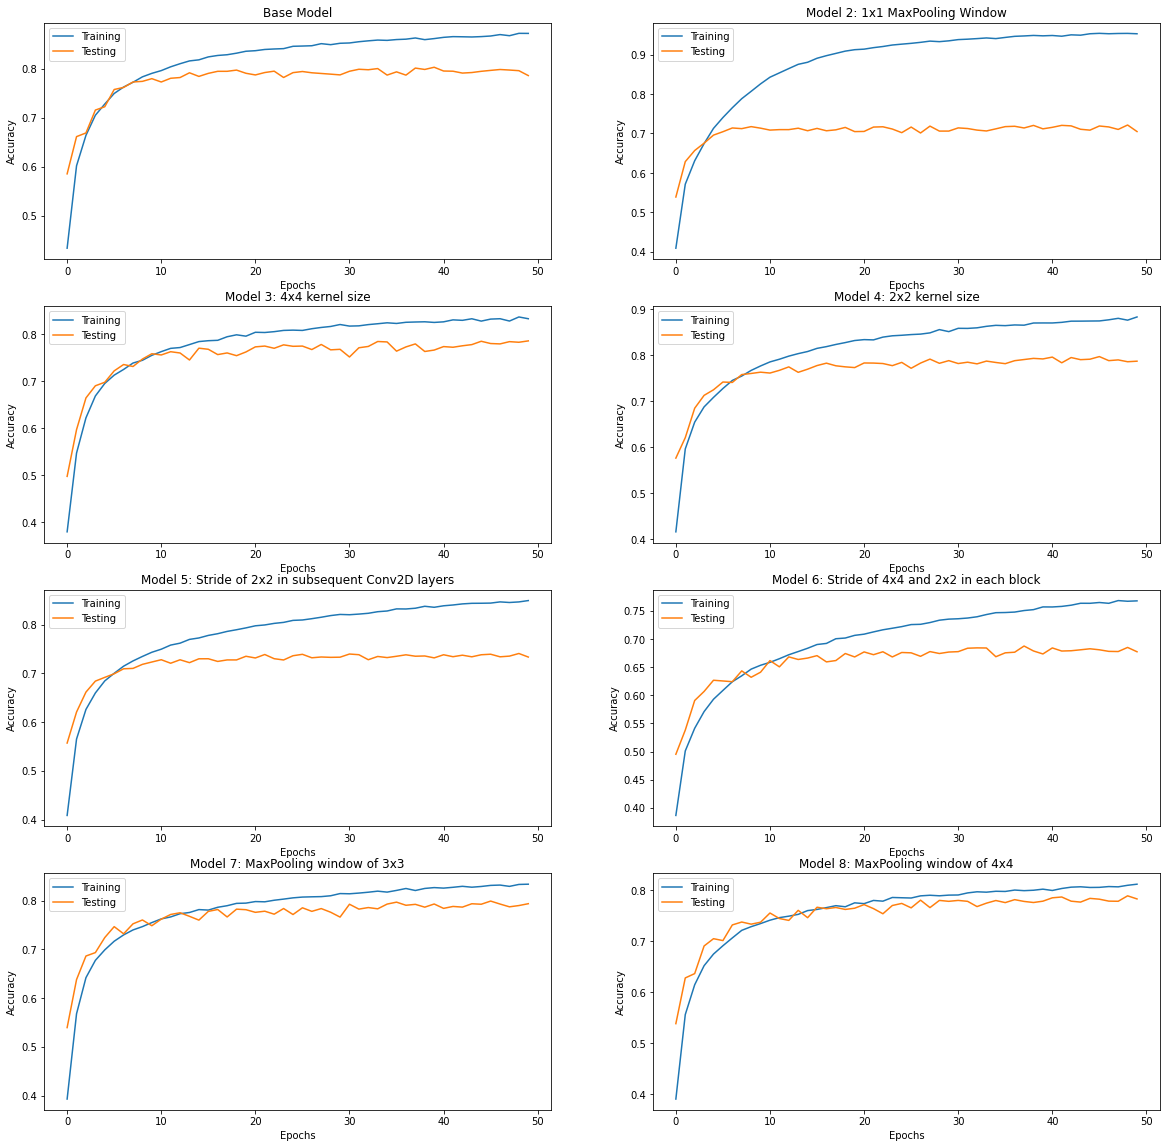

In [121]:
pyplot.subplot(4,2,1)
pyplot.plot(h.history['accuracy'], label="Training")
pyplot.plot(h.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Base Model")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,2)
pyplot.plot(h2.history['accuracy'], label="Training")
pyplot.plot(h2.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 2: 1x1 MaxPooling Window")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,3)
pyplot.plot(h3.history['accuracy'], label="Training")
pyplot.plot(h3.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 3: 4x4 kernel size")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,4)
pyplot.plot(h4.history['accuracy'], label="Training")
pyplot.plot(h4.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 4: 2x2 kernel size")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,5)
pyplot.plot(h5.history['accuracy'], label="Training")
pyplot.plot(h5.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 5: Stride of 2x2 in subsequent Conv2D layers")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,6)
pyplot.plot(h6.history['accuracy'], label="Training")
pyplot.plot(h6.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 6: Stride of 4x4 and 2x2 in each block")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,7)
pyplot.plot(h7.history['accuracy'], label="Training")
pyplot.plot(h7.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 7: MaxPooling window of 3x3")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

pyplot.subplot(4,2,8)
pyplot.plot(h8.history['accuracy'], label="Training")
pyplot.plot(h8.history['val_accuracy'], label="Testing")
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.title("Model 8: MaxPooling window of 4x4")
pyplot.legend()
pyplot.gcf().set_size_inches(20,20)

From the graphs show above, having a low MaxPooling2D windows improves overall training accuracy, but decreases validation accuracy. For an increased window size, the opposite is true, with a lower accuracy and higher validation accuracy.

Having a large kernel window does improve the validation accuracy and not too much of a difference in terms of testing accuracy.

Using any amount of stride apart from the default of 1x1 results in much lower training accuracy and the validation accuracy converges to that of the training.

